In [2]:
import pandas as pd
from io import StringIO

In [3]:
data_text = """
date,crude_price_per_barrel,operational_cost_per_barrel,refined_gasoline_liters,refined_diesel_liters
2025-08-25,68.0,4.5,100000,50000
2025-08-26,67.5,4.6,105000,52000
2025-08-27,67.8,4.7,110000,55000
2025-08-28,68.2,4.8,108000,53000
2025-08-29,67.9,4.9,112000,56000
2025-08-30,67.7,5.0,115000,58000
2025-08-31,68.5,5.1,120000,60000
"""

In [4]:
refinery = StringIO(data_text)
refinery_data = pd.read_csv(refinery)

In [5]:
refinery_data

,date,crude_price_per_barrel,operational_cost_per_barrel,refined_gasoline_liters,refined_diesel_liters
0,2025-08-25,68.0,4.5,100000,50000
1,2025-08-26,67.5,4.6,105000,52000
2,2025-08-27,67.8,4.7,110000,55000
3,2025-08-28,68.2,4.8,108000,53000
4,2025-08-29,67.9,4.9,112000,56000
5,2025-08-30,67.7,5.0,115000,58000
6,2025-08-31,68.5,5.1,120000,60000


In [6]:
text_data = """
 product_type,price_per_liter_usd
 Gasoline,0.90
 Diesel,0.90
"""

In [7]:
price = StringIO(text_data)

price_data = pd.read_csv(price)

In [8]:
price_data

,product_type,price_per_liter_usd
0,Gasoline,0.9
1,Diesel,0.9


In [9]:
price_data.columns

Index([' product_type', 'price_per_liter_usd'], dtype='object')

In [10]:
price_data.columns = price_data.columns.str.strip()

In [11]:
price_data.columns

Index(['product_type', 'price_per_liter_usd'], dtype='object')

In [12]:
price_data['product_type'].unique()

array([' Gasoline', ' Diesel'], dtype=object)

In [13]:
price_data["product_type"] = price_data["product_type"].str.strip()

In [14]:
transaction_data = pd.read_csv("cleaned_dataset_1.csv")
transaction_data.head()

,transaction_id,station_id,date,product_type,volume_liters,transaction_amount_usd,inventory_level_liters
0,T1001,ST001,2025-08-25,Gasoline,50,45.0,20000
1,T1002,ST002,2025-08-25,Diesel,75,67.5,15000
2,T1003,ST003,2025-08-25,Gasoline,30,27.0,25000
3,T1004,ST004,2025-08-25,Diesel,40,36.0,18000
4,T1005,ST005,2025-08-25,Gasoline,60,54.0,22000


In [15]:
transaction_data['date'].nunique()

7

In [16]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          37 non-null     object 
 1   station_id              37 non-null     object 
 2   date                    37 non-null     object 
 3   product_type            37 non-null     object 
 4   volume_liters           37 non-null     int64  
 5   transaction_amount_usd  37 non-null     float64
 6   inventory_level_liters  37 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ KB


In [17]:
# Transactions (daily sales)

daily_sales = (
    transaction_data.groupby(["date", "product_type"])
    .agg({"volume_liters": "sum", "transaction_amount_usd": "sum"})
    .reset_index()
)

daily_sales

,date,product_type,volume_liters,transaction_amount_usd
0,2025-08-25,Diesel,115,103.5
1,2025-08-25,Gasoline,140,126.0
2,2025-08-26,Diesel,122,109.8
3,2025-08-26,Gasoline,152,136.8
4,2025-08-27,Diesel,127,114.3
5,2025-08-27,Gasoline,161,144.9
6,2025-08-28,Diesel,119,107.1
7,2025-08-28,Gasoline,146,131.4
8,2025-08-29,Diesel,129,116.1
9,2025-08-29,Gasoline,156,140.4


### Reasoning:

The raw transaction data contains individual sales records (transaction-level). For analysis and modeling, it’s often more useful to work at a daily aggregated level. By grouping by date and product_type:

- I obtain total daily sales volume and revenue for each fuel type, reducing noise from individual transactions.

- This aggregation makes it easier to analyze trends over time, compare product performance, and link sales with other daily factors (e.g., refinery output, crude costs).

It also prepares the data for merging with external datasets that are recorded daily like price data and refinery data.

In [18]:
# Merged with retail prices (static values, assume constant per day)
daily_sales = daily_sales.merge(price_data, on="product_type", how="left")


### Reasoning:
Retail prices are essential to understand revenue drivers and margins. Merging ensures that for each product type (diesel, gasoline), we align its unit price with the corresponding daily sales. This allows:

- Checking whether transaction revenue aligns with expected revenue (price × volume).

- Analyzing the impact of pricing on sales volume and profitability.


In [19]:
daily_sales

,date,product_type,volume_liters,transaction_amount_usd,price_per_liter_usd
0,2025-08-25,Diesel,115,103.5,0.9
1,2025-08-25,Gasoline,140,126.0,0.9
2,2025-08-26,Diesel,122,109.8,0.9
3,2025-08-26,Gasoline,152,136.8,0.9
4,2025-08-27,Diesel,127,114.3,0.9
5,2025-08-27,Gasoline,161,144.9,0.9
6,2025-08-28,Diesel,119,107.1,0.9
7,2025-08-28,Gasoline,146,131.4,0.9
8,2025-08-29,Diesel,129,116.1,0.9
9,2025-08-29,Gasoline,156,140.4,0.9


In [20]:
daily_sales.to_csv("Integrated_dataset.csv", index=False)

In [21]:
# Validated transaction revenue using price_per_liter_usd
daily_sales["expected_revenue_usd"] = (
    daily_sales["volume_liters"] * daily_sales["price_per_liter_usd"]
)

daily_sales["revenue_diff"] = (
    daily_sales["transaction_amount_usd"] - daily_sales["expected_revenue_usd"]
)

# checking to see if are discrepancies
daily_sales[["date", "product_type", "transaction_amount_usd", 
                   "expected_revenue_usd", "revenue_diff"]].head()

,date,product_type,transaction_amount_usd,expected_revenue_usd,revenue_diff
0,2025-08-25,Diesel,103.5,103.5,0.0
1,2025-08-25,Gasoline,126.0,126.0,0.0
2,2025-08-26,Diesel,109.8,109.8,0.0
3,2025-08-26,Gasoline,136.8,136.8,0.0
4,2025-08-27,Diesel,114.3,114.3,0.0


## Observation

The amounts in transaction_amount_usd column is same as amounts in the expected_revenue_usd column. This shows that the transaction_amount_usd is properly derived using the price per liter used and volume liter

In [22]:
daily_sales_pivot = daily_sales.pivot_table(
    index=["date"],
    columns="product_type",
    values=["volume_liters", "transaction_amount_usd"],
    aggfunc="sum"
).reset_index().fillna(0)


In [23]:
daily_sales_pivot

date transaction_amount_usd          volume_liters  \
product_type                             Diesel Gasoline        Diesel   
0             2025-08-25                  103.5    126.0           115   
1             2025-08-26                  109.8    136.8           122   
2             2025-08-27                  114.3    144.9           127   
3             2025-08-28                  107.1    131.4           119   
4             2025-08-29                  116.1    140.4           129   
5             2025-08-30                  111.6    137.7           124   
6             2025-08-31                  212.5    143.1           205   

                       
product_type Gasoline  
0                 140  
1                 152  
2                 161  
3                 146  
4                 156  
5                 153  
6                 259

In [24]:
# Flatten column names
daily_sales_pivot.columns = ["date",
    "diesel_sales_liters", "gasoline_sales_liters",
    "diesel_sales_usd", "gasoline_sales_usd"]

In [25]:
daily_sales_pivot

,date,diesel_sales_liters,gasoline_sales_liters,diesel_sales_usd,gasoline_sales_usd
0,2025-08-25,103.5,126.0,115,140
1,2025-08-26,109.8,136.8,122,152
2,2025-08-27,114.3,144.9,127,161
3,2025-08-28,107.1,131.4,119,146
4,2025-08-29,116.1,140.4,129,156
5,2025-08-30,111.6,137.7,124,153
6,2025-08-31,212.5,143.1,205,259


In [26]:
# Compute total sales
daily_sales_pivot["total_sales_liters"] = (
    daily_sales_pivot["diesel_sales_liters"].fillna(0) +
    daily_sales_pivot["gasoline_sales_liters"].fillna(0)
)

In [27]:
daily_sales_pivot

,date,diesel_sales_liters,gasoline_sales_liters,diesel_sales_usd,gasoline_sales_usd,total_sales_liters
0,2025-08-25,103.5,126.0,115,140,229.5
1,2025-08-26,109.8,136.8,122,152,246.6
2,2025-08-27,114.3,144.9,127,161,259.2
3,2025-08-28,107.1,131.4,119,146,238.5
4,2025-08-29,116.1,140.4,129,156,256.5
5,2025-08-30,111.6,137.7,124,153,249.3
6,2025-08-31,212.5,143.1,205,259,355.6


In [28]:
daily_sales_pivot["total_sales_usd"] = (
    daily_sales_pivot["diesel_sales_usd"].fillna(0) +
    daily_sales_pivot["gasoline_sales_usd"].fillna(0)
)

In [29]:
daily_sales_pivot

,date,diesel_sales_liters,gasoline_sales_liters,diesel_sales_usd,gasoline_sales_usd,total_sales_liters,total_sales_usd
0,2025-08-25,103.5,126.0,115,140,229.5,255
1,2025-08-26,109.8,136.8,122,152,246.6,274
2,2025-08-27,114.3,144.9,127,161,259.2,288
3,2025-08-28,107.1,131.4,119,146,238.5,265
4,2025-08-29,116.1,140.4,129,156,256.5,285
5,2025-08-30,111.6,137.7,124,153,249.3,277
6,2025-08-31,212.5,143.1,205,259,355.6,464


### Reason for Feature Engineering

The separate sales columns for diesel and gasoline provide product-specific insights, but they don’t directly show the overall business performance. By engineering total_sales_liters and total_sales_usd, we capture the combined sales volume and revenue across all fuel types.

- total_sales_liters helps measure total market demand (regardless of product type) and makes it easier to track overall consumption patterns.

- total_sales_usd provides a single indicator of overall revenue, useful for profitability analysis and financial forecasting.

In [30]:
# Merge with Refinery Data
integrated_data = refinery_data.merge(daily_sales_pivot, on="date", how="left")


### Reason for merge

- I merged the refinery operations data with the aggregated daily sales data on the date column to bring together supply-side information (crude price, operational cost, refined output) and demand-side performance (sales volume and revenue)

In [31]:
integrated_data.head()

,date,crude_price_per_barrel,operational_cost_per_barrel,refined_gasoline_liters,refined_diesel_liters,diesel_sales_liters,gasoline_sales_liters,diesel_sales_usd,gasoline_sales_usd,total_sales_liters,total_sales_usd
0,2025-08-25,68.0,4.5,100000,50000,103.5,126.0,115,140,229.5,255
1,2025-08-26,67.5,4.6,105000,52000,109.8,136.8,122,152,246.6,274
2,2025-08-27,67.8,4.7,110000,55000,114.3,144.9,127,161,259.2,288
3,2025-08-28,68.2,4.8,108000,53000,107.1,131.4,119,146,238.5,265
4,2025-08-29,67.9,4.9,112000,56000,116.1,140.4,129,156,256.5,285


In [32]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         7 non-null      object 
 1   crude_price_per_barrel       7 non-null      float64
 2   operational_cost_per_barrel  7 non-null      float64
 3   refined_gasoline_liters      7 non-null      int64  
 4   refined_diesel_liters        7 non-null      int64  
 5   diesel_sales_liters          7 non-null      float64
 6   gasoline_sales_liters        7 non-null      float64
 7   diesel_sales_usd             7 non-null      int64  
 8   gasoline_sales_usd           7 non-null      int64  
 9   total_sales_liters           7 non-null      float64
 10  total_sales_usd              7 non-null      int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 748.0+ bytes


### Feature Engineering

In [33]:
# Converted barrels to liters (1 barrel ≈ 159 liters)
integrated_data["total_refined_liters"] = (
    integrated_data["refined_gasoline_liters"] + integrated_data["refined_diesel_liters"]
)

integrated_data["barrels_refined"] = integrated_data["total_refined_liters"] / 159


In [34]:
# Costs
integrated_data["crude_cost_usd"] = integrated_data["crude_price_per_barrel"] * integrated_data["barrels_refined"]
integrated_data["operational_cost_usd"] = integrated_data["operational_cost_per_barrel"] * integrated_data["barrels_refined"]

# Profit = Revenue - (Crude + Operations)
integrated_data["profit_usd"] = (
    integrated_data["total_sales_usd"] - integrated_data["crude_cost_usd"] - integrated_data["operational_cost_usd"]
)

In [35]:
integrated_data.head()

,date,crude_price_per_barrel,operational_cost_per_barrel,refined_gasoline_liters,refined_diesel_liters,diesel_sales_liters,gasoline_sales_liters,diesel_sales_usd,gasoline_sales_usd,total_sales_liters,total_sales_usd,total_refined_liters,barrels_refined,crude_cost_usd,operational_cost_usd,profit_usd
0,2025-08-25,68.0,4.5,100000,50000,103.5,126.0,115,140,229.5,255,150000,943.396226,64150.943396,4245.283019,-68141.226415
1,2025-08-26,67.5,4.6,105000,52000,109.8,136.8,122,152,246.6,274,157000,987.421384,66650.943396,4542.138365,-70919.081761
2,2025-08-27,67.8,4.7,110000,55000,114.3,144.9,127,161,259.2,288,165000,1037.735849,70358.490566,4877.358491,-74947.849057
3,2025-08-28,68.2,4.8,108000,53000,107.1,131.4,119,146,238.5,265,161000,1012.578616,69057.861635,4860.377358,-73653.238994
4,2025-08-29,67.9,4.9,112000,56000,116.1,140.4,129,156,256.5,285,168000,1056.603774,71743.396226,5177.358491,-76635.754717


### Reason for Refinery Conversion & Profit Calculation

#### Conversion to Barrels and Liters

- I summed refined gasoline and diesel into total_refined_liters to capture total daily refinery output.

- Since refinery and crude data are often expressed in barrels, I converted liters to barrels (barrels_refined) using the standard conversion (1 barrel ≈ 159 liters). This allows direct comparison between refined output and crude input costs.

#### Cost Calculations

- crude_cost_usd: Computed by multiplying crude price per barrel with the number of barrels refined, representing the daily crude procurement cost.

- operational_cost_usd: Computed by multiplying operational cost per barrel with the number of barrels refined, representing the daily operating expense.

#### Profitability Measure

profit_usd: Defined as total revenue (total_sales_usd) minus crude and operational costs. This gives a daily profit metric that directly links refinery inputs, costs, and sales outcomes.

In [36]:
integrated_data.to_csv("Integrated_data.csv", index=False)

In [37]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         7 non-null      object 
 1   crude_price_per_barrel       7 non-null      float64
 2   operational_cost_per_barrel  7 non-null      float64
 3   refined_gasoline_liters      7 non-null      int64  
 4   refined_diesel_liters        7 non-null      int64  
 5   diesel_sales_liters          7 non-null      float64
 6   gasoline_sales_liters        7 non-null      float64
 7   diesel_sales_usd             7 non-null      int64  
 8   gasoline_sales_usd           7 non-null      int64  
 9   total_sales_liters           7 non-null      float64
 10  total_sales_usd              7 non-null      int64  
 11  total_refined_liters         7 non-null      int64  
 12  barrels_refined              7 non-null      float64
 13  crude_cost_usd          

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

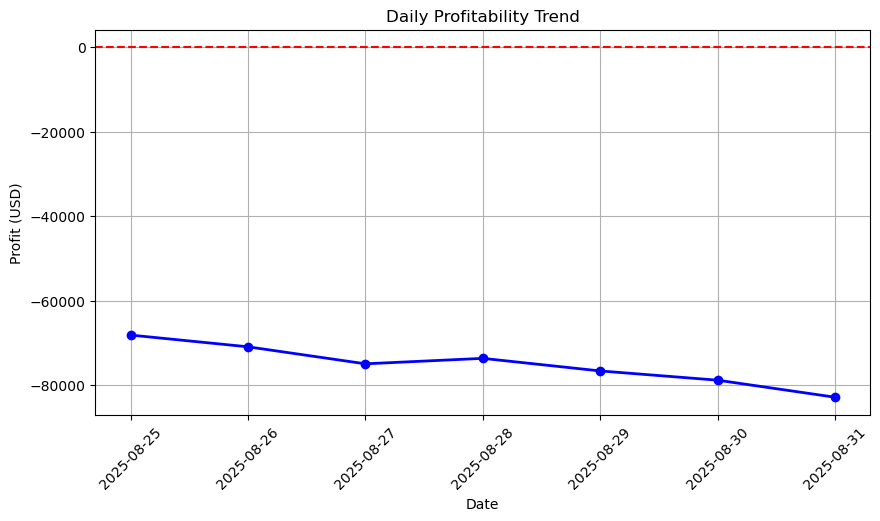

In [39]:
plt.figure(figsize=(10,5))
plt.plot(integrated_data["date"], integrated_data["profit_usd"], marker="o", color="blue", linewidth=2)
plt.title("Daily Profitability Trend")
plt.xlabel("Date")
plt.ylabel("Profit (USD)")
plt.xticks(rotation=45)
plt.axhline(0, color="red", linestyle="--")  
plt.grid(True)
plt.show()


The company is running at loss (negative profit)

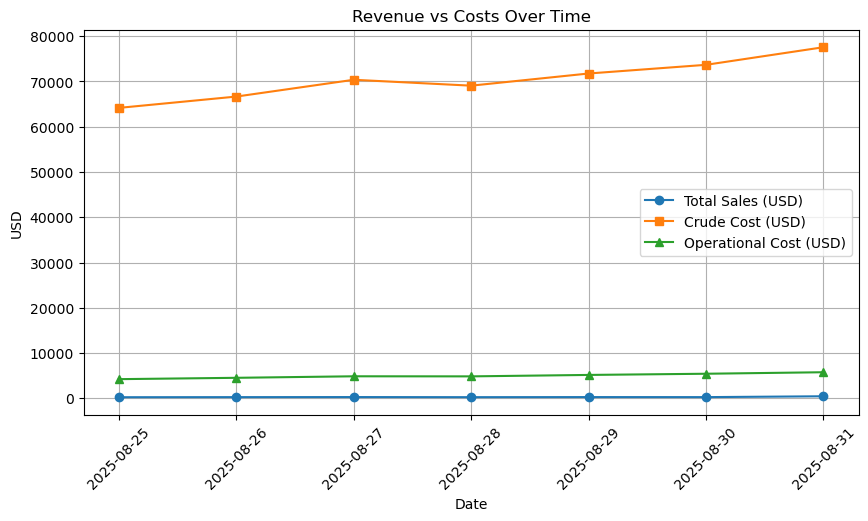

In [40]:
plt.figure(figsize=(10,5))
plt.plot(integrated_data["date"], integrated_data["total_sales_usd"], marker="o", label="Total Sales (USD)")
plt.plot(integrated_data["date"], integrated_data["crude_cost_usd"], marker="s", label="Crude Cost (USD)")
plt.plot(integrated_data["date"], integrated_data["operational_cost_usd"], marker="^", label="Operational Cost (USD)")
plt.title("Revenue vs Costs Over Time")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


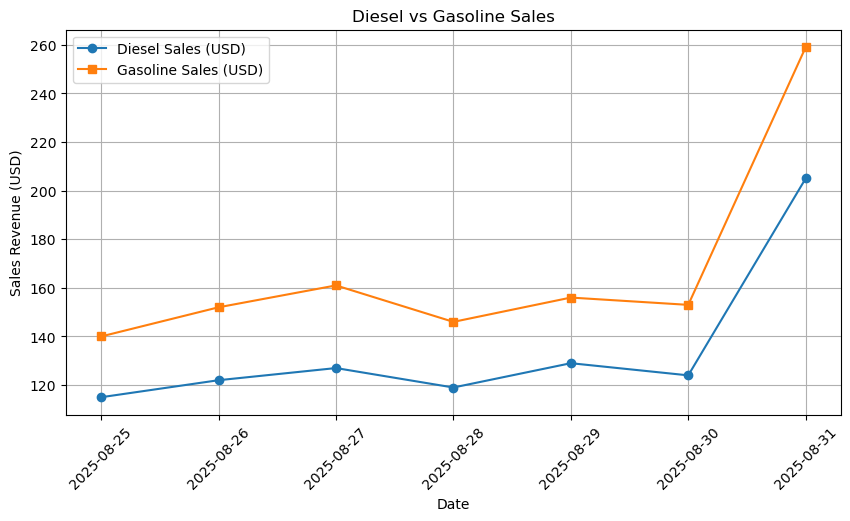

In [41]:
plt.figure(figsize=(10,5))
plt.plot(integrated_data["date"], integrated_data["diesel_sales_usd"], marker="o", label="Diesel Sales (USD)")
plt.plot(integrated_data["date"], integrated_data["gasoline_sales_usd"], marker="s", label="Gasoline Sales (USD)")
plt.title("Diesel vs Gasoline Sales")
plt.xlabel("Date")
plt.ylabel("Sales Revenue (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


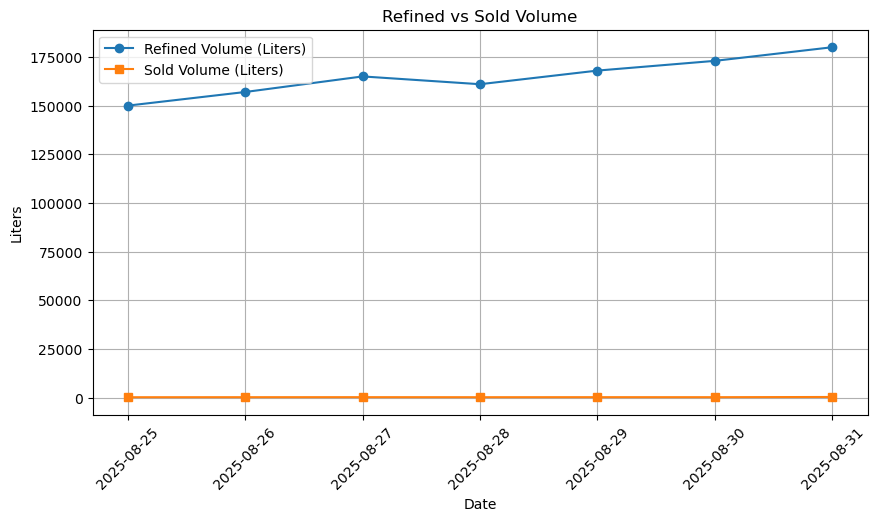

In [42]:
plt.figure(figsize=(10,5))
plt.plot(integrated_data["date"], integrated_data["total_refined_liters"], marker="o", label="Refined Volume (Liters)")
plt.plot(integrated_data["date"], integrated_data["total_sales_liters"], marker="s", label="Sold Volume (Liters)")
plt.title("Refined vs Sold Volume")
plt.xlabel("Date")
plt.ylabel("Liters")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


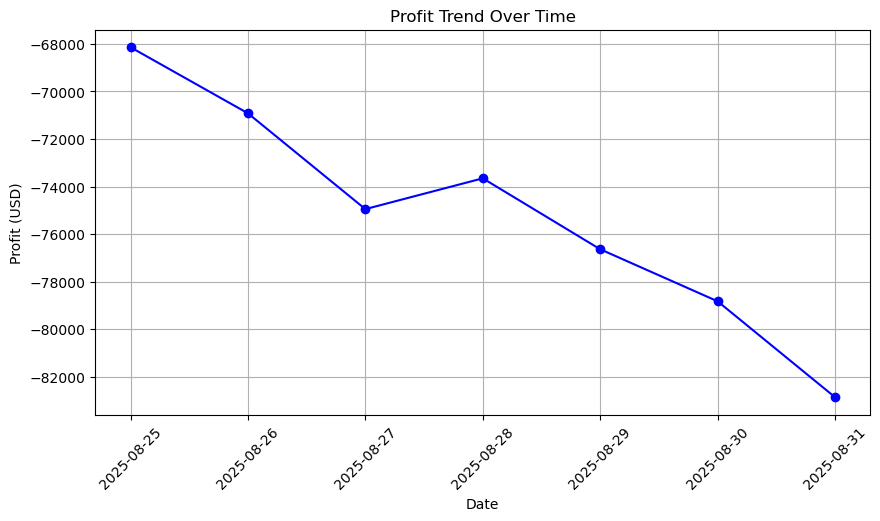

In [43]:
plt.figure(figsize=(10,5))
plt.plot(integrated_data["date"], integrated_data["profit_usd"], marker="o", color="blue")
plt.title("Profit Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Profit (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


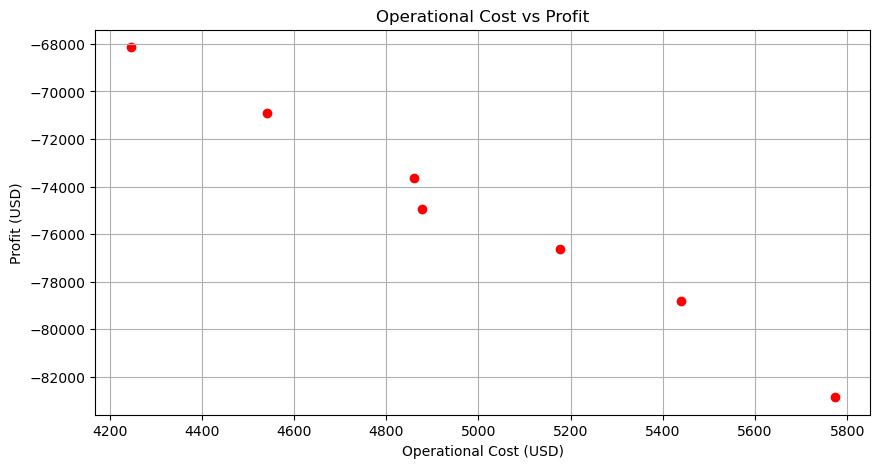

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(integrated_data["operational_cost_usd"], integrated_data["profit_usd"], color="red")
plt.title("Operational Cost vs Profit")
plt.xlabel("Operational Cost (USD)")
plt.ylabel("Profit (USD)")
plt.grid(True)
plt.show()


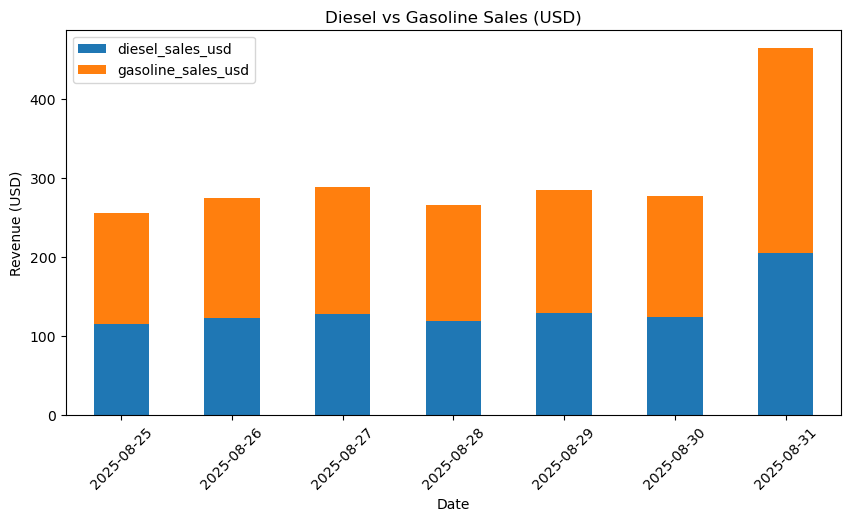

In [45]:
sales_breakdown = integrated_data[["date", "diesel_sales_usd", "gasoline_sales_usd"]].set_index("date")

sales_breakdown.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Diesel vs Gasoline Sales (USD)")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


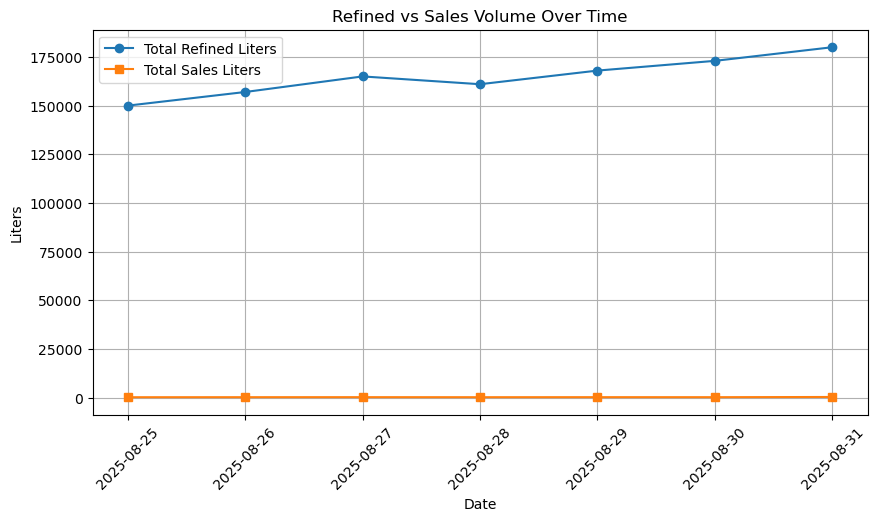

In [46]:
plt.figure(figsize=(10,5))
plt.plot(integrated_data["date"], integrated_data["total_refined_liters"], marker="o", label="Total Refined Liters")
plt.plot(integrated_data["date"], integrated_data["total_sales_liters"], marker="s", label="Total Sales Liters")
plt.title("Refined vs Sales Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Liters")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


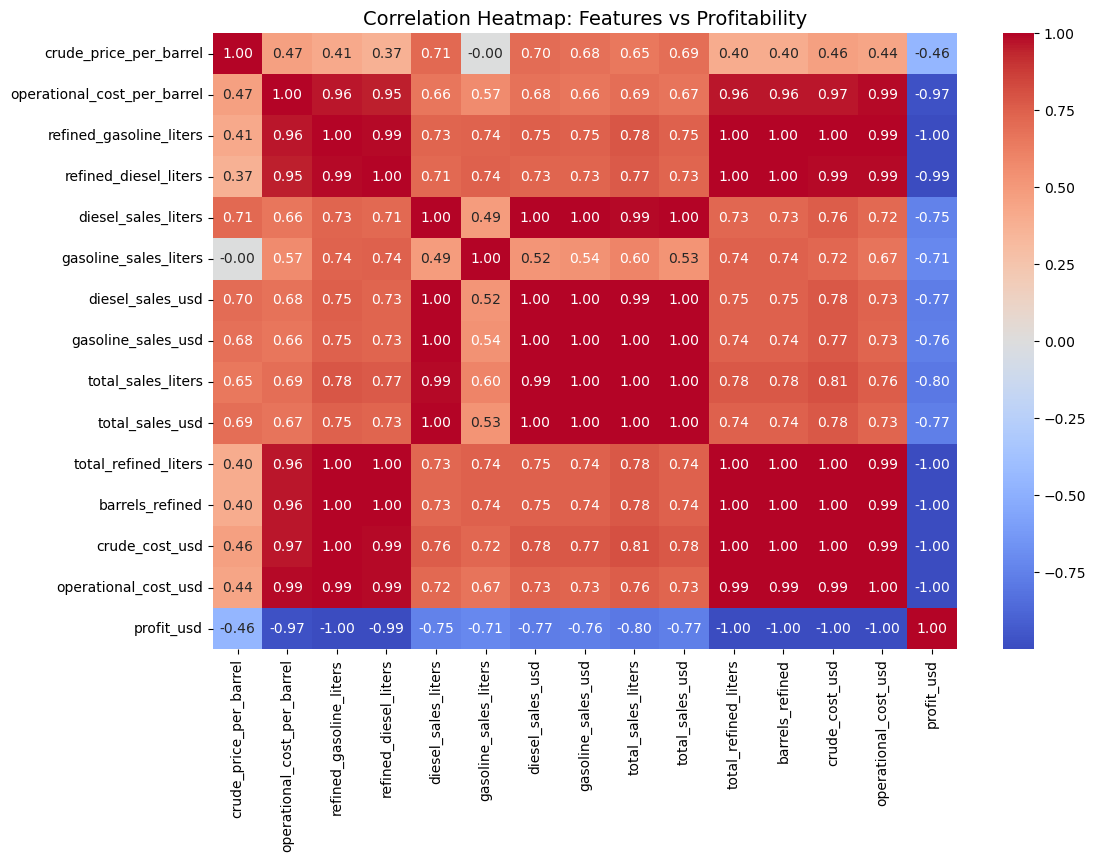

In [47]:
plt.figure(figsize=(12,8))
corr = integrated_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Features vs Profitability", fontsize=14)
plt.show()

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np


Correlation of features with profit_usd:
 profit_usd                     1.000000
crude_price_per_barrel        -0.457321
gasoline_sales_liters         -0.714059
diesel_sales_liters           -0.748922
gasoline_sales_usd            -0.763027
total_sales_usd               -0.765174
diesel_sales_usd              -0.767278
total_sales_liters            -0.796700
operational_cost_per_barrel   -0.969450
refined_diesel_liters         -0.992106
operational_cost_usd          -0.995450
barrels_refined               -0.997817
total_refined_liters          -0.997817
refined_gasoline_liters       -0.998064
crude_cost_usd                -0.999822
Name: profit_usd, dtype: float64

Linear Regression Coefficients (Impact on Profitability):
                        Feature   Coefficient
13         operational_cost_usd -1.002935e+00
12               crude_cost_usd -1.000041e+00
9               total_sales_usd  4.976761e-01
7            gasoline_sales_usd  3.473202e-01
4           diesel_sales_liters  2.5

C:\Users\HomePC\AppData\Local\Temp\ipykernel_2736\1640834184.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeffs, palette="viridis")


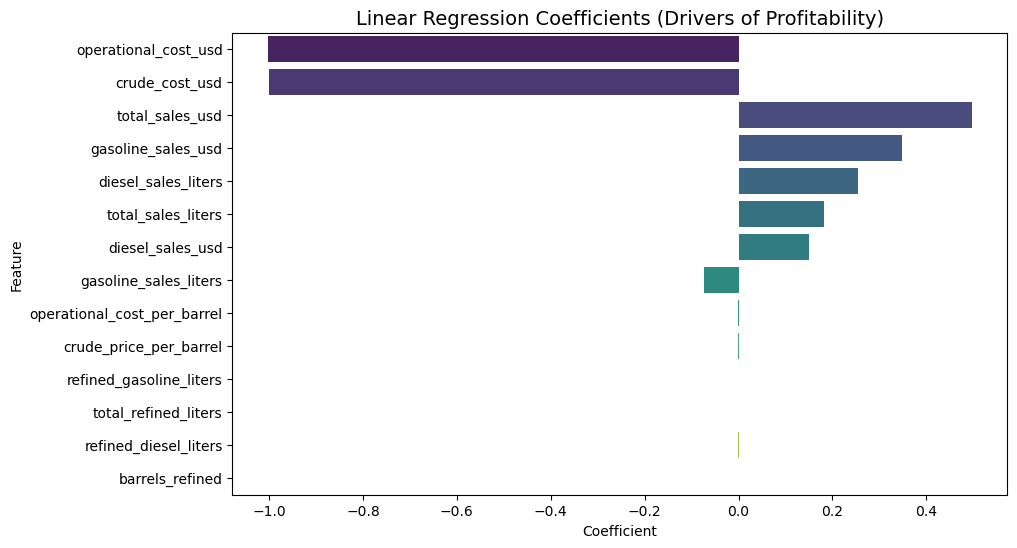

C:\Users\HomePC\AppData\Local\Temp\ipykernel_2736\1640834184.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances, palette="magma")


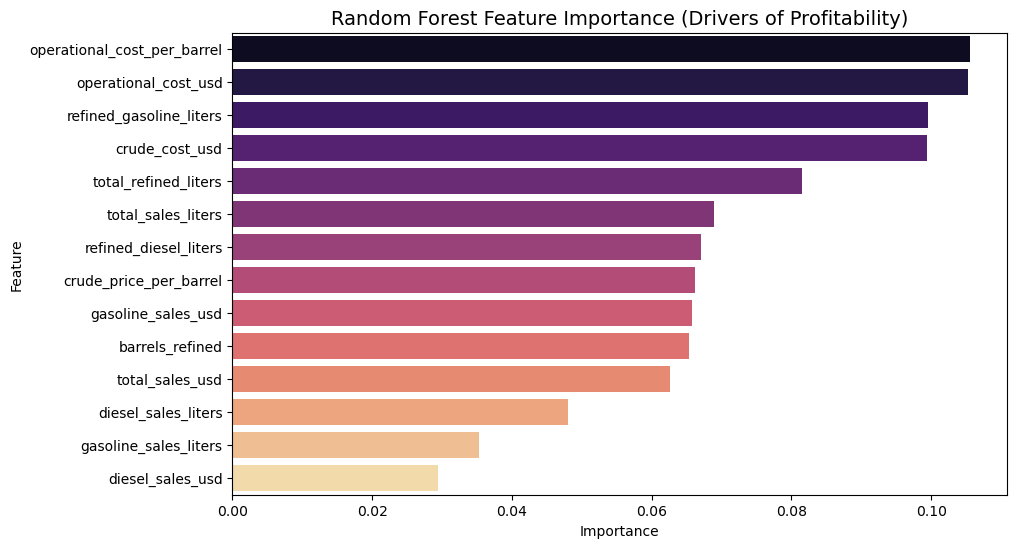

In [49]:
# Focus on profit_usd correlations
profit_corr = corr["profit_usd"].sort_values(ascending=False)
print("Correlation of features with profit_usd:\n", profit_corr)

# Regression Modeling (Linear) ---

X = integrated_data.drop(columns=["date", "profit_usd"])
y = integrated_data["profit_usd"]

# Simple linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Coefficients
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nLinear Regression Coefficients (Impact on Profitability):")
print(coeffs)

# Feature Importance (Random Forest) ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importance (Non-linear impacts):")
print(importances)

# Visualization of Key Drivers ---
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coeffs, palette="viridis")
plt.title("Linear Regression Coefficients (Drivers of Profitability)", fontsize=14)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importances, palette="magma")
plt.title("Random Forest Feature Importance (Drivers of Profitability)", fontsize=14)
plt.show()

## Observations 

### Correlation with profit_usd

#### Correlation only captures linear relationships (positive or negative).

##### Strong negative correlations:

- crude_cost_usd (-0.9998), refined_gasoline_liters (-0.998), operational_cost_usd (-0.995), barrels_refined (-0.998),...

These negative correlations shows that as costs, refined volumes, or barrels processed increase, profit decreases — likely because rising costs and overproduction outweigh revenue gains.

##### Moderate negative correlations:

- diesel_sales_usd (-0.767), total_sales_usd (-0.765), gasoline_sales_usd (-0.763).

- These moderate corelations shows that more sales revenue correlates with lower profit, possibly because higher sales are tied to higher refining costs.

Moderate negative correlation with crude price (-0.457):

- As crude prices rise, the cost of production rises faster than revenue, so profits shrink.

- Overall: Costs and production volumes dominate and drag profitability down.

### 2. Linear Regression Coefficients

#### This shows the marginal impact of each feature on profit (when holding others constant).

##### Strong negative drivers:

- operational_cost_usd (-1.00), crude_cost_usd (-1.00).

This means that every additional $1 in cost reduces profit almost dollar-for-dollar.

##### Positive contributors:

-total_sales_usd (+0.50), gasoline_sales_usd (+0.35), diesel_sales_liters (+0.26).

This means that higher sales add to profit, but not at the same rate as costs reduce it.

##### Small/near-zero impacts:

- Refining volumes (refined_diesel_liters, barrels_refined, etc.) have negligible coefficients once costs are controlled.

- Overall: Profitability is most sensitive to controlling operational and crude costs, while sales have a positive but weaker effect.

### Random Forest Feature Importance

#### This captures non-linear and interaction effects (which correlation and regression might miss).

##### Most important factors:

- operational_cost_per_barrel (0.106), operational_cost_usd (0.105), crude_cost_usd (0.099), refined_gasoline_liters (0.099).

- Interpretation: Profitability depends heavily on cost efficiency and refining outputs.

##### Moderately important:

- total_sales_liters, refined_diesel_liters, crude_price_per_barrel.

- Sales volumes and crude prices play secondary roles, influencing margins but not as strongly as costs.

##### Least important:

- diesel_sales_usd, gasoline_sales_liters.

Suggests that absolute sales alone don’t explain much once costs and volumes are accounted for.

- Overall: The non-linear view still highlights cost efficiency and refining scale as the main levers.

In [50]:
integrated_data.date.dtype

dtype('O')

In [51]:
integrated_data["date"] = pd.to_datetime(integrated_data["date"])
integrated_data = integrated_data.sort_values("date")


In [52]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

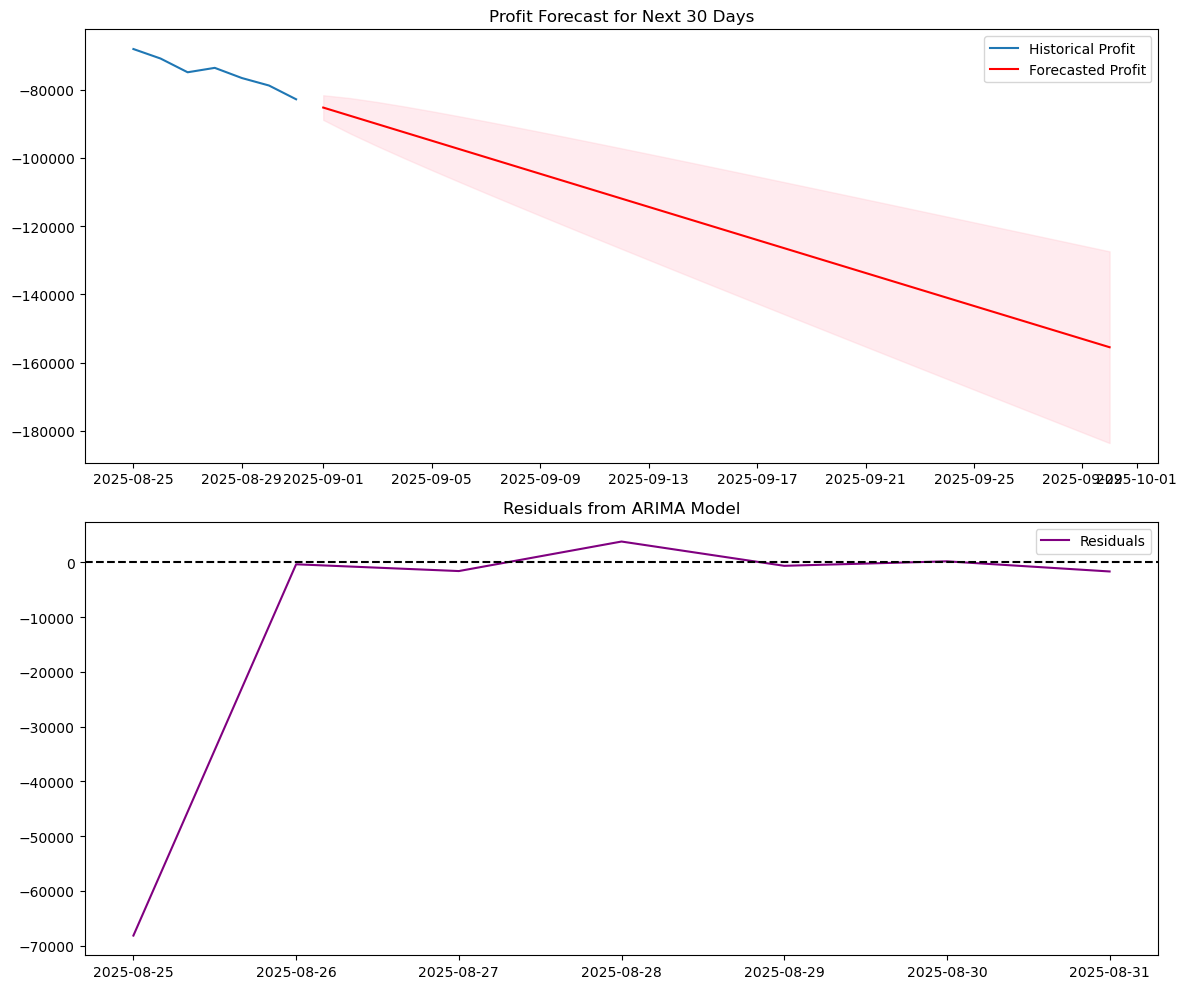

In [53]:
# date as index
ts = integrated_data.set_index("date")["profit_usd"]

# Fit ARIMA model 
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


# Residuals
residuals = model_fit.resid


# Plot forecast + residuals side by side
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# --- 1. Forecast plot
axes[0].plot(ts, label="Historical Profit")
axes[0].plot(forecast_mean.index, forecast_mean, label="Forecasted Profit", color="red")
axes[0].fill_between(forecast_mean.index, 
                     conf_int.iloc[:,0], 
                     conf_int.iloc[:,1], 
                     color="pink", alpha=0.3)
axes[0].legend()
axes[0].set_title("Profit Forecast for Next 30 Days")

# --- 2. Residuals plot
axes[1].plot(residuals, label="Residuals", color="purple")
axes[1].axhline(y=0, linestyle="--", color="black")
axes[1].set_title("Residuals from ARIMA Model")
axes[1].legend()

plt.tight_layout()
#plt.show()

# Save plot
plt.savefig("profit_forecast.png", dpi=300, bbox_inches="tight")

plt.show()


## Interpretation of 30-Day Profit Forecast

### The forecast shows refinery profitability projected over the next 30 days. Key insights include:

- Downward Trend: The model predicts that profitability will continue to decline steadily. The mean forecast line (in red) shows a worsening loss position over the forecast horizon.

- Negative Profits: All projected values remain negative, suggesting that under current operating and market conditions, the refinery is not expected to generate positive returns in the short term.

- Uncertainty Range: The shaded confidence interval widens over time, indicating greater uncertainty in the forecast as the prediction moves further away from the historical data. This is typical of time-series forecasts, but it emphasizes the need for caution when relying on projections beyond the immediate weeks.

- Implication: The forecast highlights an urgent need to address cost inefficiencies or improve revenue streams (e.g., optimizing crude purchase prices, increasing product sales, or reducing operational overhead) to reverse the declining trend.

In [55]:
import pickle

# Saved the fitted ARIMA model
with open("arima_model.pkl", "wb") as f:
    pickle.dump(model_fit, f)

print("Trained ARIMA model saved as arima_model.pkl")

Trained ARIMA model saved as arima_model.pkl


In [56]:
import statsmodels
print(statsmodels.__version__)


0.14.4
